### Picking a dataset:

Boston Airbnb data from Inside Airbnb:

price data throughout the year for September 2016 until September 2019
2019 data from dataset on website from 14 September, 2018
2018 data from dataset on website from 06 October, 2017
2017 data from dataset on website from 07 September, 2016
review data from September 07, 2016
listing data from September 07, 2016

In [1]:
# importing necessary libraries
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import re
from scipy.stats import pearsonr
from datetime import datetime
from scipy.stats import ttest_ind
from collections import Counter, defaultdict
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline

In [7]:
# reading in all necessary files
calendar2017 = pd.read_csv('/Users/harshitchandrol/Documents/PORTFOLIO/ML/Boston Housing/calendar2017.csv', delimiter=',')
calendar2018 = pd.read_csv('/Users/harshitchandrol/Documents/PORTFOLIO/ML/Boston Housing/calendar2018.csv', delimiter=',')
calendar2019 = pd.read_csv('/Users/harshitchandrol/Documents/PORTFOLIO/ML/Boston Housing/calendar2019.csv', delimiter=',')

listings = pd.read_csv('/Users/harshitchandrol/Documents/PORTFOLIO/ML/Boston Housing/listings2017.csv', delimiter=',')
reviews = pd.read_csv('/Users/harshitchandrol/Documents/PORTFOLIO/ML/Boston Housing/reviews2017.csv', delimiter=',')

In [8]:
# allow for head to show all column names
pd.set_option('display.max_columns', None) 
listings.head()

id                            listing_url       scrape_id   
0  12147973  https://www.airbnb.com/rooms/12147973  20160906204935  \
1   3075044   https://www.airbnb.com/rooms/3075044  20160906204935   
2      6976      https://www.airbnb.com/rooms/6976  20160906204935   
3   1436513   https://www.airbnb.com/rooms/1436513  20160906204935   
4   7651065   https://www.airbnb.com/rooms/7651065  20160906204935   

  last_scraped                                           name   
0   2016-09-07                     Sunny Bungalow in the City  \
1   2016-09-07              Charming room in pet friendly apt   
2   2016-09-07               Mexican Folk Art Haven in Boston   
3   2016-09-07  Spacious Sunny Bedroom Suite in Historic Home   
4   2016-09-07                            Come Home to Boston   

                                             summary   
0  Cozy, sunny, family home.  Master bedroom high...  \
1  Charming and quiet room in a second floor 1910...   
2  Come stay with a friendly, middle-aged guy in ...   
3  Come experience the comforts of home away from...   
4  My comfy, clean and relaxing home is one block...   

                                               space   
0  The house has an open and cozy feel at the sam...  \
1  Small but cozy and quite room with a full size...   
2  Come stay with a friendly, middle-aged guy in ...   
3  Most places you find in Boston are small howev...   
4  Clean, attractive, private room, one block fro...   

                                         description experiences_offered   
0  Cozy, sunny, family home.  Master bedroom high...                none  \
1  Charming and quiet room in a second floor 1910...                none   
2  Come stay with a friendly, middle-aged guy in ...                none   
3  Come experience the comforts of home away from...                none   
4  My comfy, clean and relaxing home is one block...                none   

                               neighborhood_overview   
0  Roslindale is quiet, convenient and friendly. ...  \
1  The room is in Roslindale, a diverse and prima...   
2  The LOCATION: Roslindale is a safe and diverse...   
3  Roslindale is a lovely little neighborhood loc...   
4  I love the proximity to downtown, the neighbor...   

                                               notes   
0                                                NaN  \
1  If you don't have a US cell phone, you can tex...   
2  I am in a scenic part of Boston with a couple ...   
3  Please be mindful of the property as it is old...   
4  I have one roommate who lives on the lower lev...   

                                             transit   
0  The bus stop is 2 blocks away, and frequent. B...  \
1  Plenty of safe street parking. Bus stops a few...   
2  PUBLIC TRANSPORTATION: From the house, quick p...   
3  There are buses that stop right in front of th...   
4  From Logan Airport  and South Station you have...   

                                              access   
0  You will have access to 2 bedrooms, a living r...  \
1  Apt has one more bedroom (which I use) and lar...   
2  I am living in the apartment during your stay,...   
3  The basement has a washer dryer and gym area. ...   
4  You will have access to the front and side por...   

                                         interaction   
0                                                NaN  \
1  If I am at home, I am likely working in my hom...   
2  ABOUT ME: I'm a laid-back, friendly, unmarried...   
3  We do live in the house therefore might be som...   
4  I love my city and really enjoy sharing it wit...   

                                         house_rules   
0  Clean up and treat the home the way you'd like...  \
1  Pet friendly but please confirm with me if the...   
2  I encourage you to use my kitchen, cooking and...   
3  - The bathroom and house are shared so please ...   
4  Please no smoking in the house, porch or on th...   

                                       thumb

In [9]:
# sizes of the datasets
print(calendar2017.shape)
print(listings.shape)
print(reviews.shape)

(1308890, 4)
(3585, 95)
(68275, 6)


In [10]:
# check out the missing values from 
print(np.sum(calendar2017.isnull()))

print('Portion of missing values in price column: {}'.format(calendar2017["price"].isnull().sum()/calendar2017.shape[0]))

listing_id         0
date               0
available          0
price         665853
dtype: int64
Portion of missing values in price column: 0.5087157820748879


In [11]:
# what does the calendar data look like
calendar2017.head()

listing_id        date available price
0    12147973  2017-09-05         f   NaN
1    12147973  2017-09-04         f   NaN
2    12147973  2017-09-03         f   NaN
3    12147973  2017-09-02         f   NaN
4    12147973  2017-09-01         f   NaN

In [12]:
# what does the listing data look like
listings.head()

id                            listing_url       scrape_id   
0  12147973  https://www.airbnb.com/rooms/12147973  20160906204935  \
1   3075044   https://www.airbnb.com/rooms/3075044  20160906204935   
2      6976      https://www.airbnb.com/rooms/6976  20160906204935   
3   1436513   https://www.airbnb.com/rooms/1436513  20160906204935   
4   7651065   https://www.airbnb.com/rooms/7651065  20160906204935   

  last_scraped                                           name   
0   2016-09-07                     Sunny Bungalow in the City  \
1   2016-09-07              Charming room in pet friendly apt   
2   2016-09-07               Mexican Folk Art Haven in Boston   
3   2016-09-07  Spacious Sunny Bedroom Suite in Historic Home   
4   2016-09-07                            Come Home to Boston   

                                             summary   
0  Cozy, sunny, family home.  Master bedroom high...  \
1  Charming and quiet room in a second floor 1910...   
2  Come stay with a friendly, middle-aged guy in ...   
3  Come experience the comforts of home away from...   
4  My comfy, clean and relaxing home is one block...   

                                               space   
0  The house has an open and cozy feel at the sam...  \
1  Small but cozy and quite room with a full size...   
2  Come stay with a friendly, middle-aged guy in ...   
3  Most places you find in Boston are small howev...   
4  Clean, attractive, private room, one block fro...   

                                         description experiences_offered   
0  Cozy, sunny, family home.  Master bedroom high...                none  \
1  Charming and quiet room in a second floor 1910...                none   
2  Come stay with a friendly, middle-aged guy in ...                none   
3  Come experience the comforts of home away from...                none   
4  My comfy, clean and relaxing home is one block...                none   

                               neighborhood_overview   
0  Roslindale is quiet, convenient and friendly. ...  \
1  The room is in Roslindale, a diverse and prima...   
2  The LOCATION: Roslindale is a safe and diverse...   
3  Roslindale is a lovely little neighborhood loc...   
4  I love the proximity to downtown, the neighbor...   

                                               notes   
0                                                NaN  \
1  If you don't have a US cell phone, you can tex...   
2  I am in a scenic part of Boston with a couple ...   
3  Please be mindful of the property as it is old...   
4  I have one roommate who lives on the lower lev...   

                                             transit   
0  The bus stop is 2 blocks away, and frequent. B...  \
1  Plenty of safe street parking. Bus stops a few...   
2  PUBLIC TRANSPORTATION: From the house, quick p...   
3  There are buses that stop right in front of th...   
4  From Logan Airport  and South Station you have...   

                                              access   
0  You will have access to 2 bedrooms, a living r...  \
1  Apt has one more bedroom (which I use) and lar...   
2  I am living in the apartment during your stay,...   
3  The basement has a washer dryer and gym area. ...   
4  You will have access to the front and side por...   

                                         interaction   
0                                                NaN  \
1  If I am at home, I am likely working in my hom...   
2  ABOUT ME: I'm a laid-back, friendly, unmarried...   
3  We do live in the house therefore might be som...   
4  I love my city and really enjoy sharing it wit...   

                                         house_rules   
0  Clean up and treat the home the way you'd like...  \
1  Pet friendly but please confirm with me if the...   
2  I encourage you to use my kitchen, cooking and...   
3  - The bathroom and house are shared so please ...   
4  Please no smoking in the house, porch or on th...   

                                       thumb

### lets answer some questions from the data available

1. Which times of the year are especially expensive
to answer this question we can calculate the average price per day for all three calander sets and plot them on top of each other to see the patterns.

In [13]:
# cleaning the price column to allow for arithmetic operations
conv_str = lambda x: str(x)[1:].replace(',', '') if '$' in str(x) else x

calendar2017['price'] = calendar2017['price'].apply(conv_str)
calendar2017['price'] = calendar2017['price'].apply(lambda x: float(x))
calendar2017.head()

listing_id        date available  price
0    12147973  2017-09-05         f    NaN
1    12147973  2017-09-04         f    NaN
2    12147973  2017-09-03         f    NaN
3    12147973  2017-09-02         f    NaN
4    12147973  2017-09-01         f    NaN

In [14]:
# getting the descriptive statistics of average price per listing
grouped_price = calendar2017.groupby('listing_id')['price'].mean()

grouped_price.describe()

count    2906.000000
mean      196.935127
std       157.729807
min        11.000000
25%        90.000000
50%       160.000000
75%       264.717664
max      4000.000000
Name: price, dtype: float64

lets us create a cleaning and formatting function to apply the same wrangling to the 2018 and 2019 price data. then we will create a plot on top of each other.

In [15]:
# cleaning function
def clean(df, to_be_cleaned, string_remov):
    '''
    cleaning a column in a dataframe of a specified string
    INPUT: df = dataframe, to_be_cleaned = name of column that needs to be cleaned, string_remov = string in column that should be replaced
    OUTPUT: changed dataframe
    '''
    # cleaning price column
    conv_str = lambda x: str(x)[1:].replace(',', '') if string_remov in str(x) else x
    df[to_be_cleaned] = df[to_be_cleaned].apply(conv_str)
    df[to_be_cleaned] = df[to_be_cleaned].apply(lambda x: float(x))
    
    return df

In [16]:
def format_plot(df):
    '''
    formatting a column in a dataframe for a plot function
    INPUT: dataframe
    OUTPUT: Series with average price throughout time; Series with dates in np.datetime64 format
    '''
    # average price throughout time
    grouped_date = df.groupby('date')['price'].mean()
    
    # remove year from date column to allow to lay each calendar dataframe price column on top of each other
    index_date = [x[5:] for x in grouped_date.index]

    return index_date, grouped_date

In [17]:
# clean all calendar price columns
X2017, y2017 = format_plot(clean(calendar2017, 'price', '$'))
X2018, y2018 = format_plot(clean(calendar2018, 'price', '$'))
X2019, y2019 = format_plot(clean(calendar2019, 'price', '$'))

In [18]:
# format date column to datetime format, removing the year to later allow for overlapping plotting based on day and month
X2017 = [datetime.strptime(x, '%m-%d') for x in X2017]
X2018 = [datetime.strptime(x, '%m-%d') for x in X2018]
X2019 = [datetime.strptime(x, '%m-%d') for x in X2019]

In [19]:
# creating input lists for plot function
x_lst = [X2017, X2018, X2019]
y_lst = [y2017, y2018, y2019]
year_lst = ['09/2016 until 09/2017', '09/2017 until 09/2018', '09/2018 until 09/2019']
color_lst = ['b', 'r', 'g', 'y', 'm']

### Visualizing data

(array([140., 599., 438., 371., 323., 249., 205., 155., 112., 112.,  58.,
         43.,  32.,  18.,  13.,   8.,   5.,   9.,   1.,   1.,   2.,   1.,
          0.,   1.,   4.,   0.,   0.,   0.,   0.,   0.,   1.,   2.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([  11.  ,   50.89,   90.78,  130.67,  170.56,  210.45,  250.34,
         290.23,  330.12,  370.01,  409.9 ,  449.79,  489.68,  529.57,
         569.46,  609.35,  649.24,  689.13,  729.02,  768.91,  808.8 ,
         848.69,  888.58,  928.47,  968.36, 1008.25, 1048.14, 1088.03,
        1127.92, 1167.81, 1207.7 ,

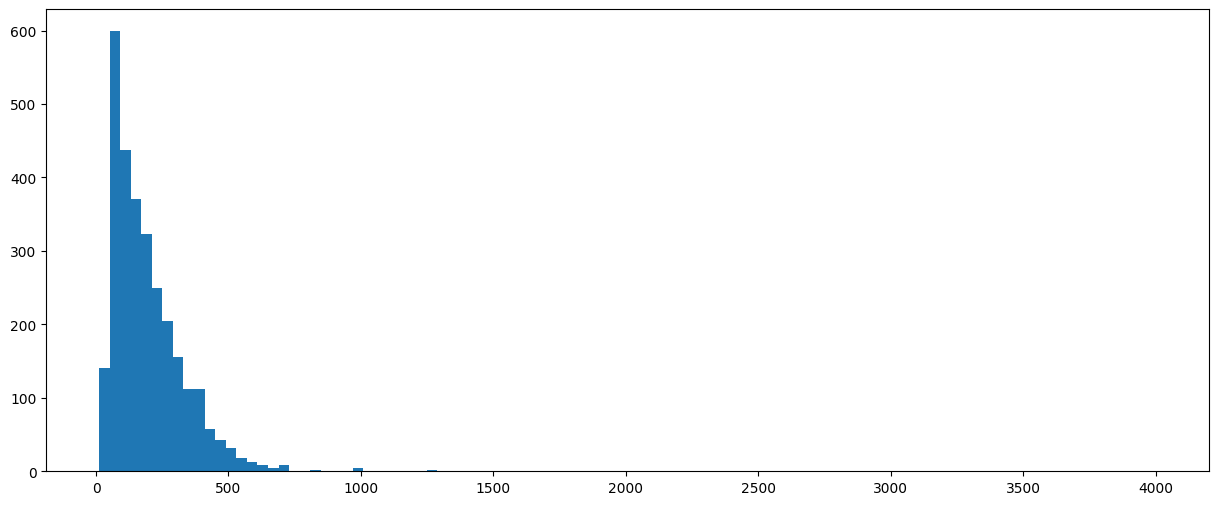

In [20]:
# plot the average prices across all listing ids
plt.figure(figsize=(15,6))
plt.hist(grouped_price, bins=100)

In [21]:
# average price throughout time
grouped_date = calendar2017.groupby('date')['price'].mean()

grouped_date.describe()

count    365.000000
mean     201.165200
std       20.989130
min      177.023002
25%      186.764936
50%      196.100469
75%      205.207474
max      286.921977
Name: price, dtype: float64

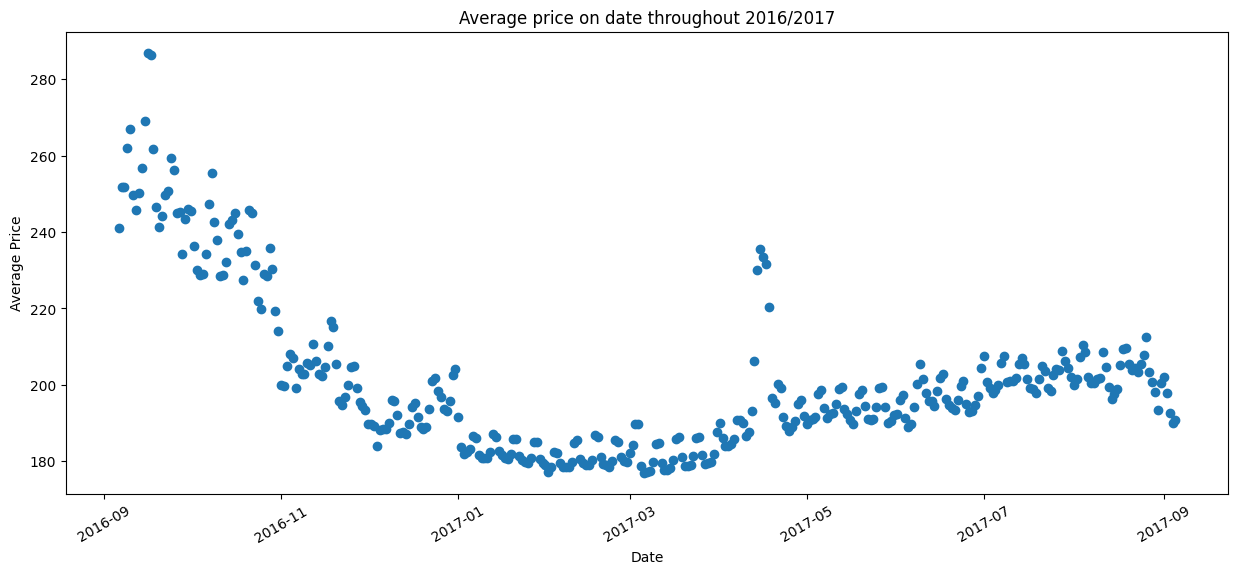

In [22]:
# plot the average prices across all dates for 2016/2017 file
index_date = [np.datetime64(x) for x in grouped_date.index]

fig, ax = plt.subplots(figsize=(15,6))

plt.scatter(index_date, grouped_date.values)
plt.xlabel('Date')
plt.ylabel('Average Price')
#ax.set_ylim([100,500])
plt.title('Average price on date throughout 2016/2017')
plt.xticks(rotation=30);

In [23]:
# plotting the price data of relevant calendar dataframes
def plot_cal(x_lst, y_lst, year_lst, color_lst):
    '''
    This function returns a scatterplot with average price data from multiple years layed ontop of each other
    INPUT: index_date is x_lst, grouped_date is y_lst
    OUTPUT: scatterplot of all average prices of calendar dataframes over time
    '''
    # plot data
    fig, ax = plt.subplots(figsize=(15,6))
    
    for i in range(len(x_lst)):
        ax.scatter(x_lst[i], y_lst[i].values, c=color_lst[i], label=year_lst[i])
    
    plt.xlabel('Date')
    plt.ylabel('Average Price')
    ax.set_ylim([100,500])
    monthyearFmt = mdates.DateFormatter('%B')
    ax.xaxis.set_major_formatter(monthyearFmt)
    plt.legend(loc='upper left')
    plt.title('Average prices throughout the year')

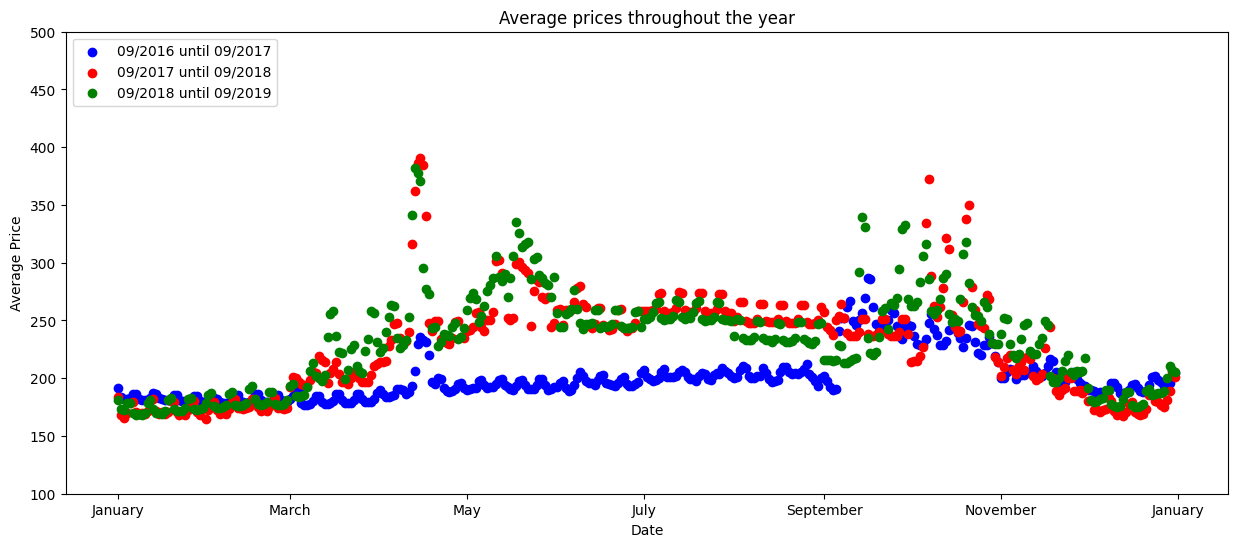

In [24]:
# plotting all three calendars' average prices
plot_cal(x_lst, y_lst, year_lst, color_lst)

In [25]:
# check how many of the properties had adjusted prices throughout the year
std_price = calendar2017.groupby('listing_id')['price'].std()

print(list(std_price.values).count(0.0))
print(std_price.shape[0])

1007
3585


there are 1007 properties that do not fluctuate in price, while more than 2000 do fluctuate throughout the year.

#### we can see that especially in mid-april, mid-may and mid-september until mid-oct prices spikes. This can be explained by Boston marathon taking place in mid-April and many college graduations hapeenning in mid-may. the data from the calander files was taken from Airbnb in september of each year. This explains the price spikes from mid-sep to mid-oct as this can be seen as a late bookings fee. 

In [26]:
## we can also look for neighbourhoods are more residential and which are more vibrant?

to look for the insight for this question we can first take a look at the neighbourhood overview col and group all reviews by neighbourhood. we will remove any attribute which do not have a neighbourhood overview. then we will create a function to plot a wordcloud for each of the neighbourhood.

through iterative process, we may identify which additional words, aside from the pre-installed stopwords, to exclude from the wordcloud, such as neighbourhood name to get more meaningful results. 

to sort the neighbourhood from quite to vibrant. we will create a dictionary of all the neighbourhoods and the number of occurances of a certain word. for the quite neighbourhoods, we can choose words like quite, safe, residential, friendly, family etc. and for vibrand we can loook for vibrant, electic
attraction, restaurant, vibe, hip, theater, center etc. 

In [27]:
# how many values are missing in neighborhood_overview
np.sum(listings.isnull())['neighborhood_overview']

listings_neigh = listings.dropna(axis=0, subset=['neighborhood_overview'], how='any')

np.sum(listings_neigh.isnull())['neighborhood_overview']

0

In [28]:
# creating new dataframe that shows grouped reviews by neighborhood
neigh_ov = pd.DataFrame(listings_neigh.groupby('neighbourhood_cleansed')['neighborhood_overview'].apply(str))

neigh_ov['neighborhood'] = neigh_ov.index

neigh_ov = neigh_ov.reset_index(drop=True)

In [29]:
# check whether there are missing values in this data frame
np.sum(neigh_ov.isnull())

neighborhood_overview    0
neighborhood             0
dtype: int64

In [30]:
# function to create wordclouds
def word_cloud(df, column, feature, stop_words):
    '''
    plotting word clouds based on different dataframes, columns, features and words to exclude
    INPUT: df = dataframe, column = the column that the text is grouped by, feature = the text to be plotted, stop_words = all words to be excluded from the wordcloud
    OUTPUT: wordcloud plots
    '''
    count = 0
    
    for item in df[column]:
    
        text_cont = df[df[column] == item][feature][count]
        wordcloud = WordCloud(stopwords=stop_words, random_state=42).generate(text_cont)
        count += 1

        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(item)
        plt.show()

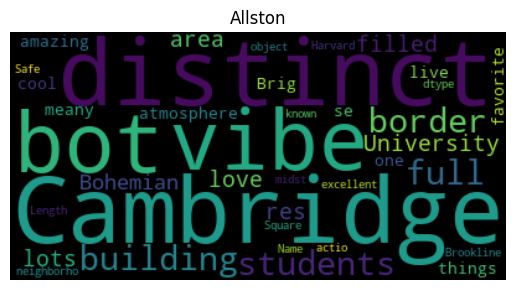

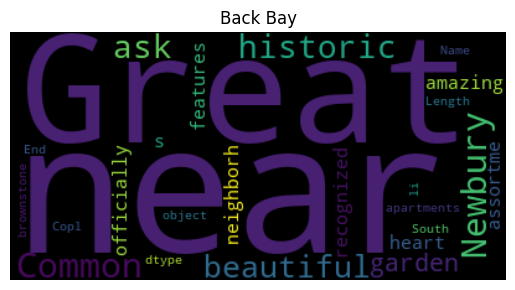

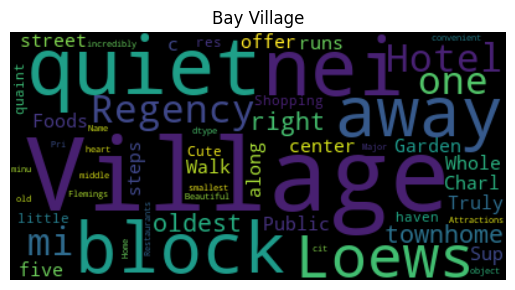

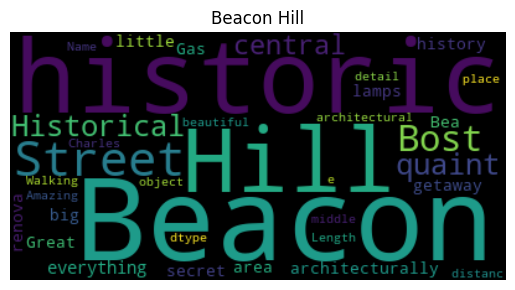

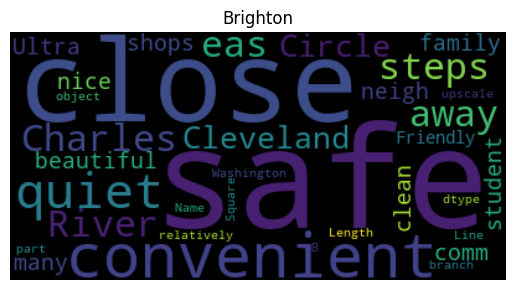

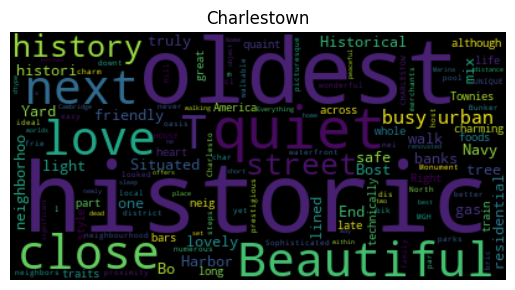

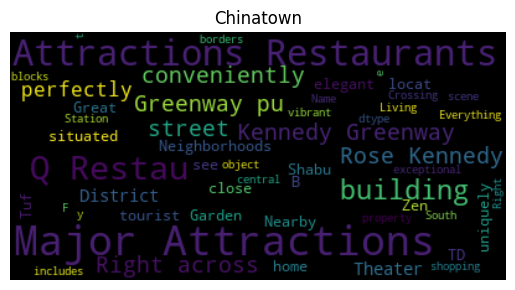

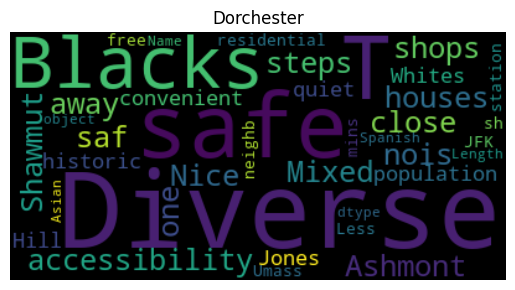

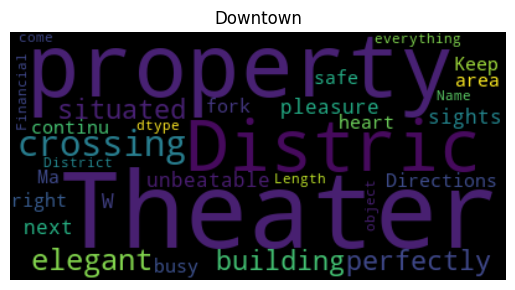

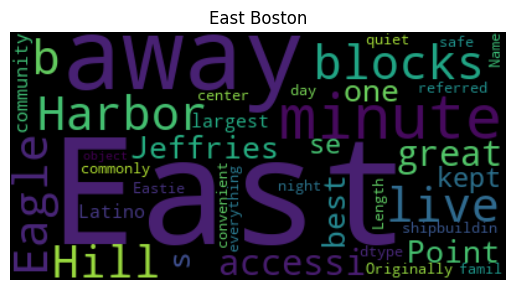

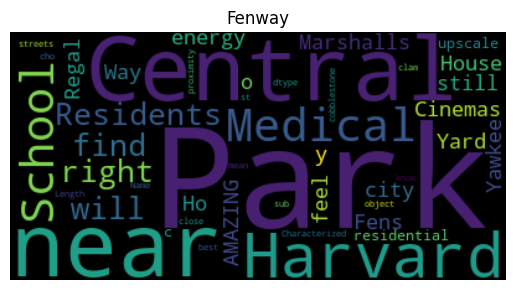

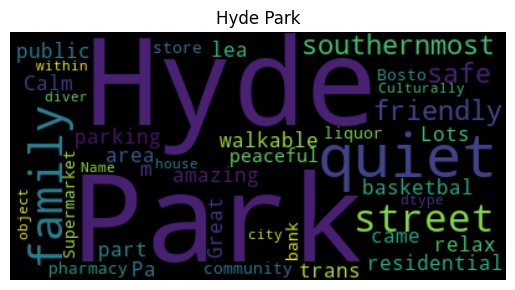

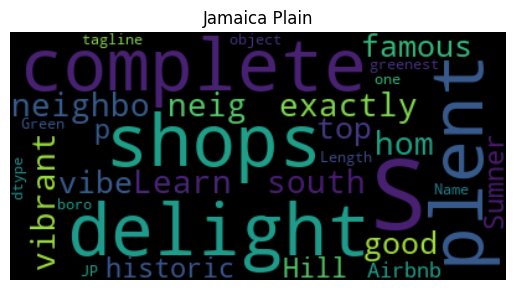

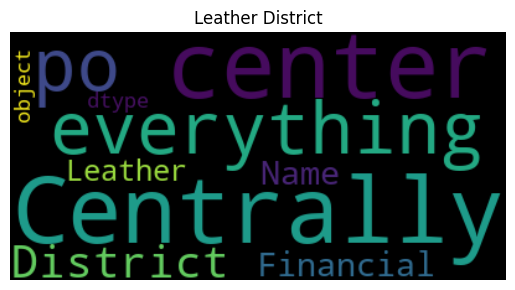

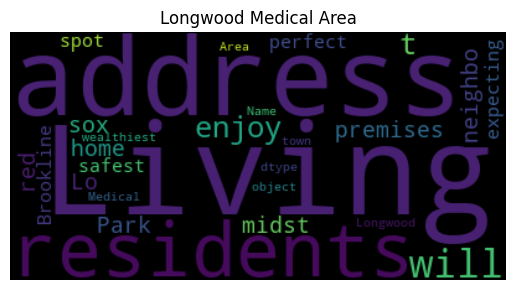

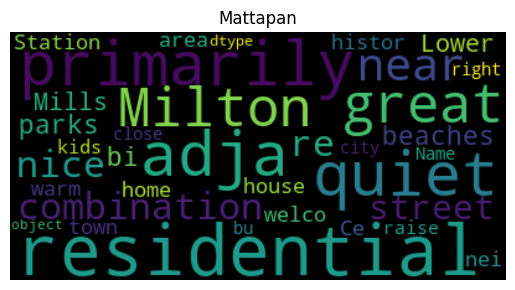

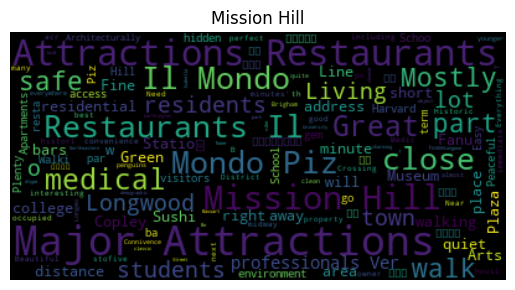

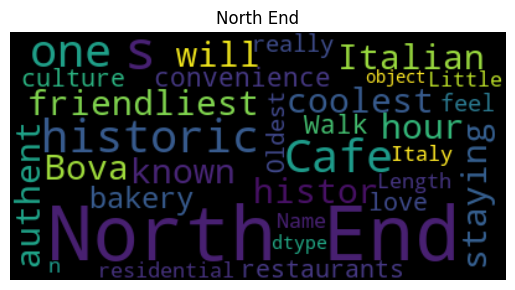

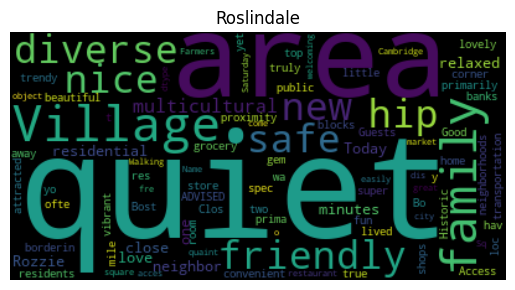

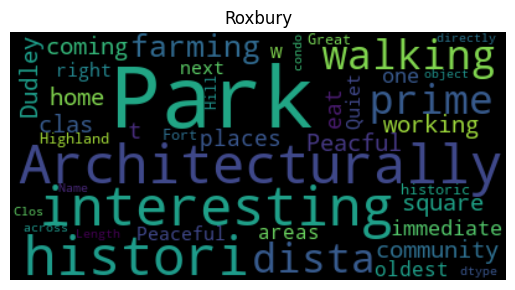

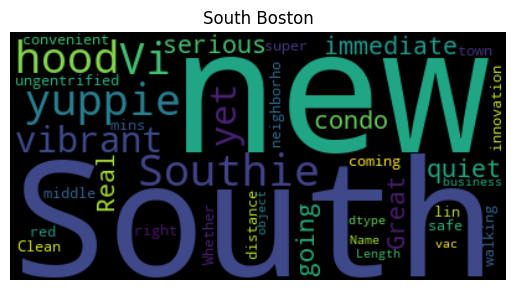

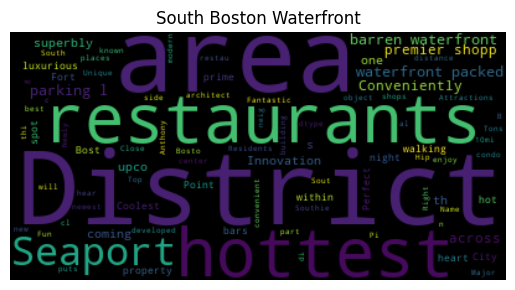

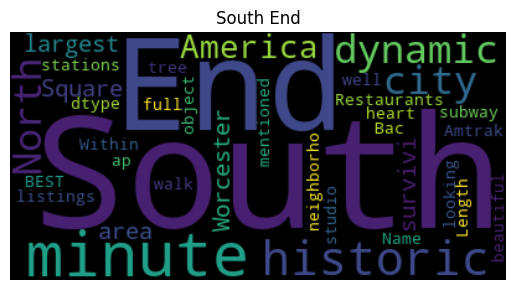

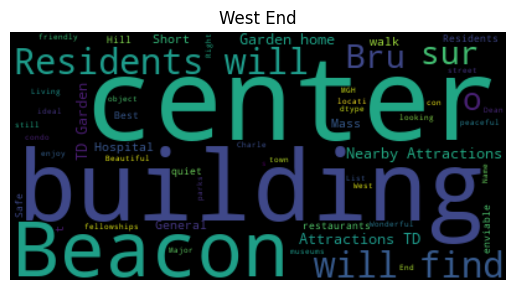

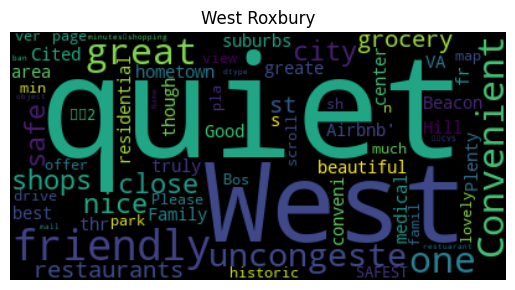

In [31]:
# create word cloud for the neighborhood descriptions
neighborhoods = set([x.lower() for x in neigh_ov['neighborhood']])
sum_stop = neighborhoods.union(set(('ha', 'back', 'bay', '...', 'jamaica', 'plain', 'apartment', 'boston', 'neighborhood', 'located', 'location')))
stop_words = STOPWORDS.union(sum_stop)

word_cloud(neigh_ov, 'neighborhood', 'neighborhood_overview', stop_words)

#### Description of all neighborhoods based on word clouds from neighborhood descriptions
Based on the initially created word clouds,here is ashort summaries for each neighborhood.

- Allston is a peaceful, secure neighborhood next to a university with a large student population.
- Back Bay: a nice and quaint area with lovely gardens, adjacent to Newbury Bay Village: a vintage community with       townhouses, and close to Regency and Loews Hotel
- Popular Charles Street is situated in the picturesque and historic Beacon Hill neighborhood in the center of Boston.
- Brighton is conveniently placed near numerous facilities, is peaceful, and is safe.
- One of the oldest, most historic, and charming neighborhoods is Charlestown.
- Chinatown: A thriving district featuring top sights, eateries, and the Rose Kennedy Greenway
- Dorchester is a private, secure, and peaceful neighborhood with a mixed population.
- Downtown: A populated area with a wealth of adjacent activities, including theaters and the TD Garden.
- East Boston, a neighborhood in the heart of the city along the harbor that used to be home to a mixed population and   shipyards,
- Fenway Park: A park near Harvard Medical School that features cobblestone paths and a few amenities, such eateries     and movie theaters
- Family-friendly, peaceful, and secure Hyde Park is the southernmost neighborhood.
- Jamaica Plain: A great-feeling community that is eclectic, diversified, and alive.
- Financial area, in the heart of Boston, with everything around Leather area Longwood Medical Area a neighborhood
- Mattapan: A primarily residential region near Milton featuring parks and a beach area
- Mission Hill: Lots of eateries close by, residential areas that are peaceful and secure.
- Little Italy is located in North End, a historic district with lots of cafés and restaurants.
- Roslindale: Family-friendly, trendy, and varied community in a peaceful village
- Fort Hill and Highland Park are located in Roxbury, a tranquil and attractively designed region.
- Safe neighborhood in South Boston with access to a lot of pubs, restaurants, and the ocean on foot
- The ports, a deserted shoreline, and several restaurants can be found at South Boston shoreline, one of the city's     most popular areas.
- Boston's South End is conveniently situated near Boston Commons and is home to a large number of eateries.
- West End: Situated in the middle of various attractions, including TD Garden West, and close to Beacon Hill Roxbury:   suburbia in a peaceful, uncrowded location

In [32]:
# function to get the most common words of a string
def most_com(df, column, feature, name, stop_words, top_k=15):
    '''
    return the most common words of a string
    INPUT: df = dataframe, column = groupby column, feature = feature in dataframe with text to be analyzed, 
           name = name of certain return of groupby column, stop_words = words to disregard, 
           top_k = top most common words (default is 15)
    OUTPUT: list of tuples with word and count of word
    '''
    text = df[df[column] == name][feature][df.loc[df[column] == name].index[0]]
    text = re.findall(r"[\w']+", text)
    text = [word.lower() if word[-1] != 's' else word[:-1].lower() for word in text]

    most_com = Counter(word for word in text if word not in stop_words).most_common(top_k)
    
    return most_com

In [33]:
# dictionary with top 15 most common words for all neighborhoods
top_all = defaultdict()
for item in neigh_ov['neighborhood']:
    top_all[item] = most_com(neigh_ov, 'neighborhood', 'neighborhood_overview', item, stop_words)

I'll compute a ratio of occurrence per word so I may compare the neighborhoods depending on their stillness or business. 'Quiet' is the term that appears the most in the neighborhood summary for Roslindale, as an illustration. Roslindale will thus earn 1 for the attribute "quiet." In its summaries, Jamaica Plain uses the adjective bright. It is not the most used term, though. Jamaica receives a score of -0.5, which is calculated by multiplying the number of times the term "vibrant" appears in its overviews by the number of times it appears overall. The -1 separates the subdued word clusters from the lively ones.

In [39]:
# creating dictionaries with information on quiet, safe, residential, family-friendly neighborhoods
# creating dictionaries with information on vibrant, eclectic neighborhoods with attractions
name_quiet = ['quiet', 'safe', 'family', 'friendly', 'residential']
name_vibe = ['vibrant', 'attraction', 'restaurant', 'vibe', 'theater' ,'hip', 'center']

def dict_quiet_vibe(name, pos_neg_sign):
    temp_dicts = []
    for item in name:
        sum_most = defaultdict()
        for k, v in top_all.items():
            
            sum_most[k] = [(num[1]/v[0][1])*pos_neg_sign for num in v if item in num]
        temp_dicts.append(sum_most)
    return temp_dicts


quiet_dicts = dict_quiet_vibe(name_quiet, 1)
vibe_dicts = dict_quiet_vibe(name_vibe, -1)

vibe_dicts

[defaultdict(None,
             {'Allston': [],
              'Back Bay': [],
              'Bay Village': [],
              'Beacon Hill': [],
              'Brighton': [],
              'Charlestown': [],
              'Chinatown': [],
              'Dorchester': [],
              'Downtown': [],
              'East Boston': [],
              'Fenway': [],
              'Hyde Park': [],
              'Jamaica Plain': [-1.0],
              'Leather District': [],
              'Longwood Medical Area': [],
              'Mattapan': [],
              'Mission Hill': [],
              'North End': [],
              'Roslindale': [],
              'Roxbury': [],
              'South Boston': [-0.5],
              'South Boston Waterfront': [],
              'South End': [],
              'West End': [],
              'West Roxbury': []}),
 defaultdict(None,
             {'Allston': [],
              'Back Bay': [],
              'Bay Village': [],
              'Beacon Hill': [],
        

In [40]:
# function to convert dicts to dataframes, clean and merge them
def dict_to_df(dict_conv, name):
    '''
    converting dict to dataframe, rearranging and renaming the columns and imputing NaNs
    INPUT: dict = dictionary to be converted, name = name of the newly added column
    OUTPUT: dataframe
    '''
    count = 0
    sum_df = pd.DataFrame()
    for diction in dict_conv:
        temp_df = pd.DataFrame.from_dict(diction, orient='index')
        temp_df.fillna(0, inplace=True)
        temp_df['neighborhood'] = temp_df.index

        temp_df = temp_df.reset_index(drop=True)
        temp_df = temp_df.rename(index=str, columns={0: name[count]})
        
        if count == 0:
            sum_df = temp_df
        else:
            sum_df = pd.merge(sum_df, temp_df, on='neighborhood', how='outer')
        count += 1
        
    return sum_df

To be able to compare the neighborhoods, I will summarize all values for all words from the word clusters I determined before and normalize those sums. Then I will plot these values per neighbor in a sorted way and mark the most quiet areas in green and the most vibrant areas in red.

In [41]:
# convert the dictionaries into dataframes and merge the two, then summarize and normalize the data to prepare for plotting
quiet_vac = dict_to_df(quiet_dicts, name_quiet)
vibe_vac = dict_to_df(vibe_dicts, name_vibe)
type_vac = pd.merge(quiet_vac, vibe_vac, on='neighborhood', how='outer')

total_names = []
total_names.extend(name_vibe)
total_names.extend(name_quiet)

type_vac['sum'] = type_vac[total_names].sum(axis=1)
type_vac['normalized'] = type_vac['sum'].apply(lambda x: (x - np.mean(type_vac['sum']))/np.std(type_vac['sum']))

type_vac['colors'] = ['red' if x < 0 else 'green' for x in type_vac['normalized']]
type_vac.sort_values('normalized', inplace=True)
type_vac = type_vac.reset_index(drop=True)
type_vac = type_vac[['neighborhood', 'quiet', 'safe', 'family', 'friendly', 'residential', 'vibrant', 'attraction', 'restaurant', 'vibe', 'theater' ,'hip', 'center', 'sum', 'normalized', 'colors']]

type_vac

neighborhood     quiet      safe  family  friendly   
0                 Chinatown  0.000000  0.000000     0.0  0.000000  \
1                  West End  0.000000  0.000000     0.0  0.000000   
2              Mission Hill  0.000000  0.363636     0.0  0.000000   
3                   Allston  0.000000  0.000000     0.0  0.000000   
4          Leather District  0.000000  0.000000     0.0  0.000000   
5                  Downtown  0.000000  0.000000     0.0  0.000000   
6             Jamaica Plain  0.000000  0.000000     0.0  0.000000   
7   South Boston Waterfront  0.000000  0.000000     0.0  0.000000   
8               East Boston  0.000000  0.000000     0.0  0.000000   
9                    Fenway  0.000000  0.000000     0.0  0.000000   
10                South End  0.000000  0.000000     0.0  0.000000   
11              Beacon Hill  0.000000  0.000000     0.0  0.000000   
12    Longwood Medical Area  0.000000  0.000000     0.0  0.000000   
13                 Back Bay  0.000000  0.000000     0.0  0.000000   
14                North End  0.000000  0.000000     0.0  0.000000   
15                  Roxbury  0.000000  0.000000     0.0  0.000000   
16             South Boston  0.500000  0.000000     0.0  0.000000   
17              Bay Village  0.571429  0.000000     0.0  0.000000   
18               Dorchester  0.000000  0.666667     0.0  0.000000   
19              Charlestown  0.833333  0.333333     0.0  0.000000   
20                 Brighton  0.400000  1.000000     0.0  0.000000   
21             West Roxbury  1.000000  0.222222     0.0  0.444444   
22               Roslindale  1.000000  0.300000     0.4  0.300000   
23                 Mattapan  0.800000  0.000000     0.0  0.000000   
24                Hyde Park  1.000000  0.333333     0.5  0.333333   

    residential  vibrant  attraction  restaurant  vibe  theater  hip  center   
0           0.0      0.0   -1.000000   -0.608696   0.0      0.0  0.0     0.0  \
1           0.0      0.0   -0.384615    0.000000   0.0      0.0  0.0    -1.0   
2           0.0      0.0   -0.727273   -1.000000   0.0      0.0  0.0     0.0   
3           0.0      0.0    0.000000    0.000000  -1.0      0.0  0.0     0.0   
4           0.0      0.0    0.000000    0.000000   0.0      0.0  0.0    -1.0   
5           0.0      0.0    0.000000    0.000000   0.0     -1.0  0.0     0.0   
6           0.0     -1.0    0.000000    0.000000   0.0      0.0  0.0     0.0   
7           0.0      0.0    0.000000   -0.555556   0.0      0.0  0.0     0.0   
8           0.0      0.0    0.000000    0.000000   0.0      0.0  0.0     0.0   
9           0.0      0.0    0.000000    0.000000   0.0      0.0  0.0     0.0   
10          0.0      0.0    0.000000    0.000000   0.0      0.0  0.0     0.0   
11          0.0      0.0    0.000000    0.000000   0.0      0.0  0.0     0.0   
12          0.0      0.0    0.000000    0.000000   0.0      0.0  0.0     0.0   
13          0.0      0.0    0.000000    0.000000   0.0      0.0  0.0     0.0   
14          0.0      0.0    0.000000    0.000000   0.0      0.0  0.0     0.0   
15          0.0      0.0    0.000000    0.000000   0.0      0.0  0.0     0.0   
16          0.0     -0.5    0.000000    0.000000   0.0      0.0  0.0     0.0   
17          0.0      0.0    0.000000    0.000000   0.0      0.0  0.0     0.0   
18          0.0      0.0    0.000000    0.000000   0.0      0.0  0.0     0.0   
19          0.0      0.0    0.000000    0.000000   0.0      0.0  0.0     0.0   
20          0.0      0.0    0.000000    0.000000   0.0      0.0  0.0     0.0   
21          0.0      0.0    0.000000   -0.222222   0.0      0.0  0.0     0.0   
22          0.0      0.0    0.000000    0.000000   0.0      0.0 -0.3     0.0   
23          1.0      0.0    0.000000    0.000000   0.0      0.0  0.0     0.0   
24          0.0      0.0    0.000000    0.000000   0.0      0.0  0.0     0.0   

         sum  normalized colors  
0  -1.608696   -1.609780    red  
1  -1.384615   -1.396188    red  
2  -1.363636   -1.376191    red  
3  

Text(0.5, 0, 'Normalized difference form the mean')

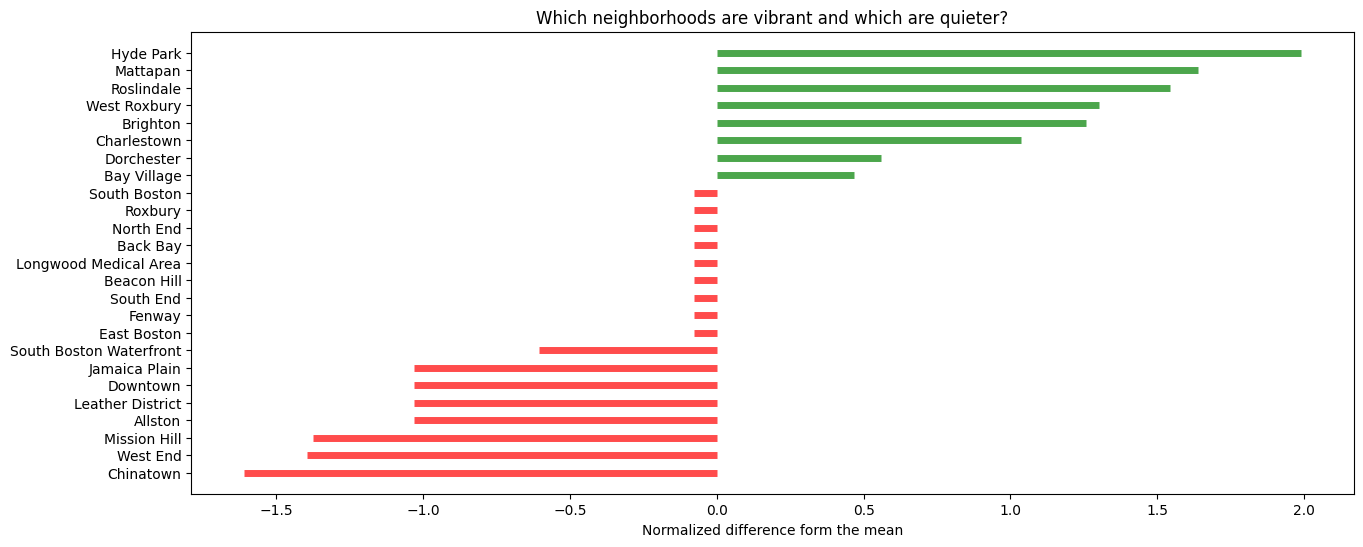

In [42]:
# plotting the neighborhoods based on how quiet or vibrant they are 
plt.figure(figsize=(15,6))

plt.hlines(y=type_vac['neighborhood'], xmin=0, xmax=type_vac['normalized'], color=type_vac['colors'], alpha=0.7, linewidth=5)
plt.title('Which neighborhoods are vibrant and which are quieter?')
plt.xlabel('Normalized difference form the mean')

## if anyone want to be very central, which neighbourhood one should look for?

In [46]:
# create separate dataframe with information of distances from center per neighborhood

BOSTON_LONG = -71.057083
BOSTON_LAT = 42.361145

avg_diff_long = listings.groupby('neighbourhood_cleansed')['longitude'].mean()
avg_diff_lat = listings.groupby('neighbourhood_cleansed')['latitude'].mean()

diff_long_df = pd.DataFrame(avg_diff_long)
diff_lat_df = pd.DataFrame(avg_diff_lat)
diff_long_df['neighborhood'] = diff_long_df.index
diff_lat_df['neighborhood'] = diff_lat_df.index
diff_long_df.reset_index(drop=True, inplace=True)
diff_lat_df.reset_index(drop=True, inplace=True)

diff_pos_df = pd.merge(diff_long_df, diff_lat_df, on='neighborhood', how='outer')
diff_pos_df = diff_pos_df[['neighborhood', 'latitude', 'longitude']]

center_row = pd.DataFrame({'neighborhood': ['Center'], 'latitude': [BOSTON_LAT], 'longitude': [BOSTON_LONG]})
diff_pos_df = pd.concat([diff_pos_df, center_row], ignore_index=True)

diff_pos_df

neighborhood   latitude  longitude
0                   Allston  42.354466 -71.130624
1                  Back Bay  42.349465 -71.081209
2               Bay Village  42.349222 -71.068435
3               Beacon Hill  42.359034 -71.067850
4                  Brighton  42.347561 -71.150239
5               Charlestown  42.379216 -71.066982
6                 Chinatown  42.350481 -71.061289
7                Dorchester  42.304301 -71.062219
8                  Downtown  42.356562 -71.061080
9               East Boston  42.374669 -71.030639
10                   Fenway  42.345094 -71.095942
11                Hyde Park  42.255385 -71.119341
12            Jamaica Plain  42.311871 -71.110171
13         Leather District  42.351241 -71.058040
14    Longwood Medical Area  42.340455 -71.108317
15                 Mattapan  42.275926 -71.081309
16             Mission Hill  42.331803 -71.103530
17                North End  42.365239 -71.054493
18               Roslindale  42.284490 -71.131020
19                  Roxbury  42.328182 -71.085445
20             South Boston  42.334991 -71.047037
21  South Boston Waterfront  42.348804 -71.045027
22                South End  42.342239 -71.073943
23                 West End  42.364140 -71.068259
24             West Roxbury  42.282511 -71.156261
25                   Center  42.361145 -71.057083

In [47]:
# creating new dataframe to store color for plot
temp_df = type_vac[['neighborhood','colors']]
temp_pos_df = pd.merge(temp_df, diff_pos_df, on='neighborhood', how='outer')

# adjusting colors for Center neighborhood and for any colors that are not top green and not top red
temp_pos_df.loc[[25], 'colors'] = 'yellow'
temp_pos_df.loc[[6, 7, 8, 9, 10, 11, 12, 13], 'colors'] = 'coral'
temp_pos_df.loc[[14, 15, 16, 17, 18], 'colors'] = 'lightgreen'

temp_pos_df

neighborhood      colors   latitude  longitude
0                 Chinatown         red  42.350481 -71.061289
1                  West End         red  42.364140 -71.068259
2              Mission Hill         red  42.331803 -71.103530
3                   Allston         red  42.354466 -71.130624
4          Leather District         red  42.351241 -71.058040
5                  Downtown         red  42.356562 -71.061080
6             Jamaica Plain       coral  42.311871 -71.110171
7   South Boston Waterfront       coral  42.348804 -71.045027
8               East Boston       coral  42.374669 -71.030639
9                    Fenway       coral  42.345094 -71.095942
10                South End       coral  42.342239 -71.073943
11              Beacon Hill       coral  42.359034 -71.067850
12    Longwood Medical Area       coral  42.340455 -71.108317
13                 Back Bay       coral  42.349465 -71.081209
14                North End  lightgreen  42.365239 -71.054493
15                  Roxbury  lightgreen  42.328182 -71.085445
16             South Boston  lightgreen  42.334991 -71.047037
17              Bay Village  lightgreen  42.349222 -71.068435
18               Dorchester  lightgreen  42.304301 -71.062219
19              Charlestown       green  42.379216 -71.066982
20                 Brighton       green  42.347561 -71.150239
21             West Roxbury       green  42.282511 -71.156261
22               Roslindale       green  42.284490 -71.131020
23                 Mattapan       green  42.275926 -71.081309
24                Hyde Park       green  42.255385 -71.119341
25                   Center      yellow  42.361145 -71.057083

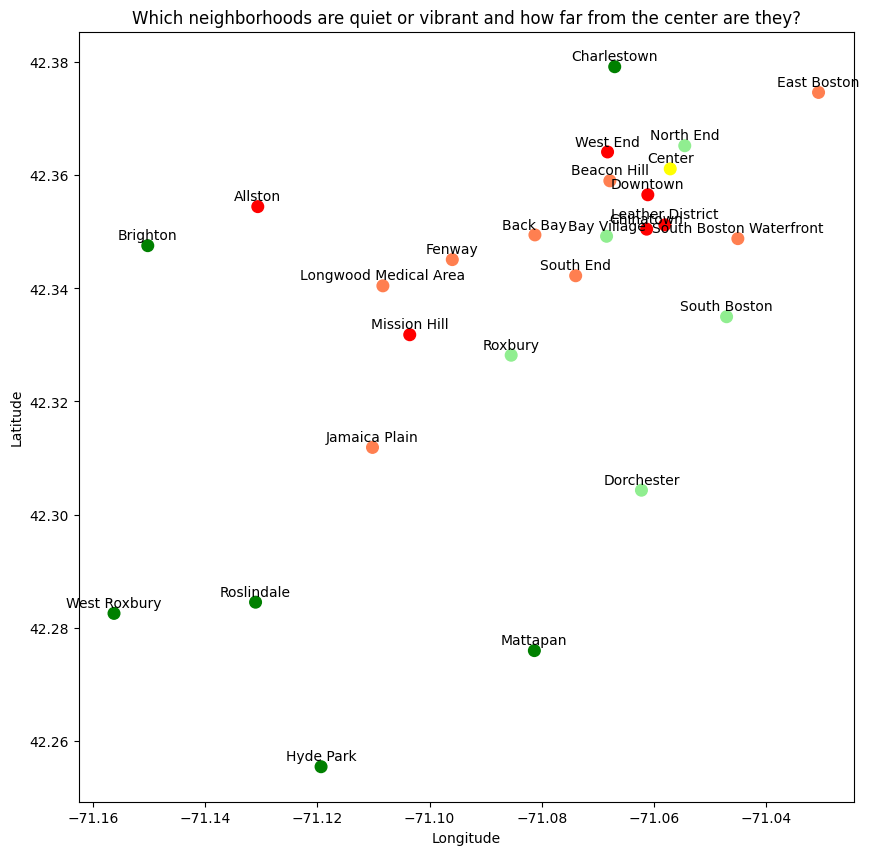

In [48]:
# plotting the distance of each neighborhood from the center and coloring dots corresponding
# to neighborhoods based on either being vibrant or quiet
fig, ax = plt.subplots(figsize=(10,10))

def plot_neighbor(x_val, y_val, text, colors, title, marker_size=70):
    '''
    plotting scatterplot showing distance, vibe and average price (if relevant) of neighborhoods
    INPUT: x_val = x values in list format, y_val = y values in list format, text = text for annotation of points,
           colors = list of colors for each data point, title = title of the plot, marker_size = size of the data points
    OUTPUT: scatterplot
    '''
    plt.scatter(x_val, y_val, s=marker_size, color=colors)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(title)

    for i, neigh in enumerate(text):
        ax.annotate(neigh, xy=(x_val[i], y_val[i]), xytext=(0, 6), textcoords='offset pixels', ha='center')

title = 'Which neighborhoods are quiet or vibrant and how far from the center are they?'
plot_neighbor(temp_pos_df['longitude'], temp_pos_df['latitude'], temp_pos_df['neighborhood'], temp_pos_df['colors'], title)

Brighton, Hyde Park, Allston are some of the quiet and safe residential areas. Chinatown, Downtown, Jamaica Plain are some of the busy, eclectic and vibrant areas.

### lets look for neighborhoods fr a good lower vacations?

In [49]:
# Average price per listing id
price_per_id = pd.DataFrame(calendar2017.groupby('listing_id')['price'].mean())
price_per_id['listing_id'] = price_per_id.index
price_per_id.index.names = ['id']
new_price = price_per_id.reset_index(drop=True)

new_price

price  listing_id
0      35.204819        3353
1     147.267442        5506
2     197.407407        6695
3      65.000000        6976
4     154.000000        8792
...          ...         ...
3580  169.515152    14924831
3581   55.000000    14928000
3582  105.380531    14928333
3583   49.000000    14933380
3584  165.113333    14933461

[3585 rows x 2 columns]

In [50]:
# merge listing and average price dataframes
avg_price = new_price.rename(index=str, columns={'price': 'avg_price', 'listing_id': 'id'})

price_reg = pd.merge(listings, avg_price, on='id', how='outer')

price_reg

id                            listing_url       scrape_id   
0     12147973  https://www.airbnb.com/rooms/12147973  20160906204935  \
1      3075044   https://www.airbnb.com/rooms/3075044  20160906204935   
2         6976      https://www.airbnb.com/rooms/6976  20160906204935   
3      1436513   https://www.airbnb.com/rooms/1436513  20160906204935   
4      7651065   https://www.airbnb.com/rooms/7651065  20160906204935   
...        ...                                    ...             ...   
3580   8373729   https://www.airbnb.com/rooms/8373729  20160906204935   
3581  14844274  https://www.airbnb.com/rooms/14844274  20160906204935   
3582  14585486  https://www.airbnb.com/rooms/14585486  20160906204935   
3583  14603878  https://www.airbnb.com/rooms/14603878  20160906204935   
3584  14504422  https://www.airbnb.com/rooms/14504422  20160906204935   

     last_scraped                                           name   
0      2016-09-07                     Sunny Bungalow in the City  \
1      2016-09-07              Charming room in pet friendly apt   
2      2016-09-07               Mexican Folk Art Haven in Boston   
3      2016-09-07  Spacious Sunny Bedroom Suite in Historic Home   
4      2016-09-07                            Come Home to Boston   
...           ...                                            ...   
3580   2016-09-07                           Big cozy room near T   
3581   2016-09-07            BU Apartment DexterPark Bright room   
3582   2016-09-07                       Gorgeous funky apartment   
3583   2016-09-07          Great Location; Train and Restaurants   
3584   2016-09-07             (K1) Private Room near Harvard/MIT   

                                                summary   
0     Cozy, sunny, family home.  Master bedroom high...  \
1     Charming and quiet room in a second floor 1910...   
2     Come stay with a friendly, middle-aged guy in ...   
3     Come experience the comforts of home away from...   
4     My comfy, clean and relaxing home is one block...   
...                                                 ...   
3580  5 min walking to Orange Line subway with 2 sto...   
3581  Most popular apartment in BU, best located in ...   
3582  Funky little apartment close to public transpo...   
3583  My place is close to Taco Loco Mexican Grill, ...   
3584  My place is close to My home is a warm and fri...   

                                                  space   
0     The house has an open and cozy feel at the sam...  \
1     Small but cozy and quite room with a full size...   
2     Come stay with a friendly, middle-aged guy in ...   
3     Most places you find in Boston are small howev...   
4     Clean, attractive, private room, one block fro...   
...                                                 ...   
3580                                                NaN   
3581                                Best location in BU   
3582  Modern and relaxed space with many facilities ...   
3583                                                NaN   
3584  To ensure a smooth check in: 1. You MUST have ...   

                                            description experiences_offered   
0     Cozy, sunny, family home.  Master bedroom high...                none  \
1     Charming and quiet room in a second floor 1910...                none   
2     Come stay with a friendly, middle-aged guy in ...                none   
3     Come experience the comforts of home away from...                none   
4     My comfy, clean and relaxing home is one block...                none   
...                                                 ...                 ...   
3580  5 min walking to Orange Line subway with 2 sto...                none   
3581  Most popular apartment in BU, best located in ...                none   
3582  Funky little apartment close to public transpo...                none   
3583  My place is close to Taco Loco Mexican Grill, ...                none   
3584  My place is close to My h

In [51]:
# Drop rows that have the avg_price value missing
price_reg = price_reg.dropna(axis=0, subset=['avg_price'], how='any')

Since imputing or dropping doesn't affect the conclusion of this specific plot, I'm removing any missing data from the avg_price column. The average price (plus the name of the neighborhood) is the only variable in this research that I am interested in. In this instance, nothing is lost.

In [52]:
# average price per neighborhood
neighborhood_price = pd.DataFrame(price_reg.groupby('neighbourhood_cleansed')['avg_price'].mean())

neighborhood_price['neighborhood'] = neighborhood_price.index
neighborhood_price = neighborhood_price.reset_index(drop=True)
neighborhood_price.sort_values('avg_price', inplace=True)

In [53]:
price_pos_df = pd.merge(temp_pos_df, neighborhood_price, on='neighborhood', how='outer')
price_pos_df.loc[[25], 'avg_price'] = 70

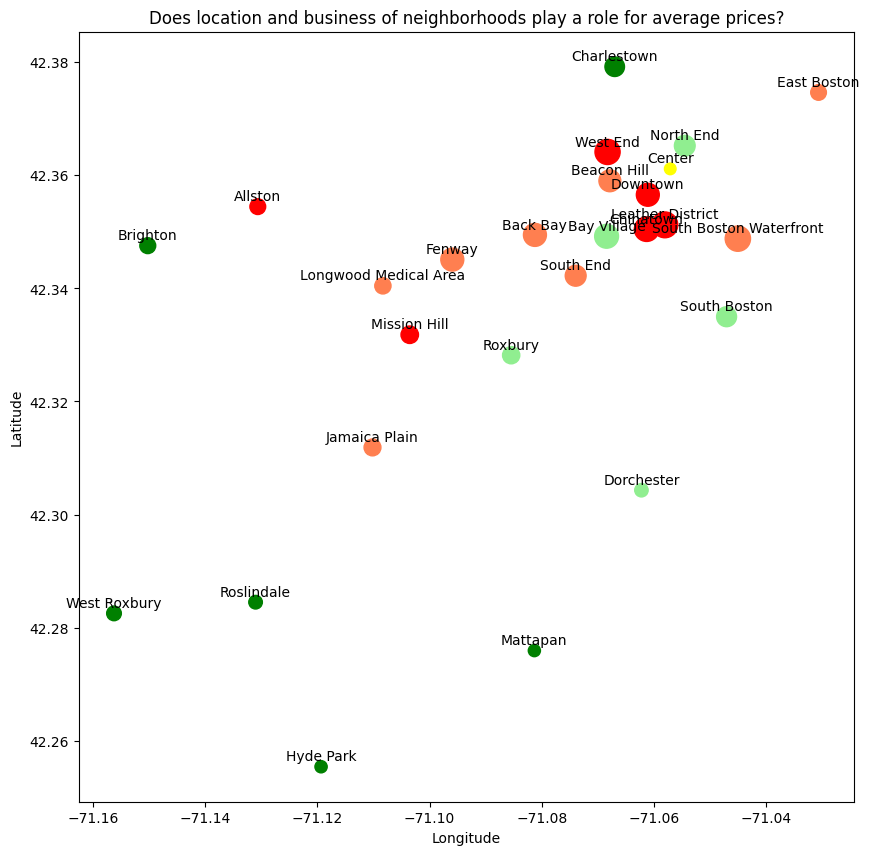

In [55]:
# plotting the distance of each neighborhood from the center and coloring dots corresponding
# to neighborhoods based on either being vibrant or quiet
# also changing the size of the points based on average price in the neighborhood
fig, ax = plt.subplots(figsize=(10,10))

title = 'Does location and business of neighborhoods play a role for average prices?'
plot_neighbor(price_pos_df['longitude'], price_pos_df['latitude'], price_pos_df['neighborhood'], price_pos_df['colors'], title, marker_size=price_pos_df['avg_price'])

The above graph just provides a general impression of the price disparities, so I'll also make another graph that displays the precise average prices by neighborhood and makes it extremely clear to the reader which neighborhoods have costs above and below average.

In [56]:
# adding column with normalized prices
normalization = lambda x: (x - np.mean(neighborhood_price['avg_price']))/np.std(neighborhood_price['avg_price'])
neighborhood_price['normalize'] = neighborhood_price['avg_price'].apply(normalization)
neighborhood_price = neighborhood_price.reset_index(drop=True)
neighborhood_price['colors'] = ['red' if val > 0 else 'green' for val in neighborhood_price['normalize'] ]

/var/folders/lq/d88dgpfd7x5dywf41x7l02dw0000gn/T/ipykernel_21144/3492976615.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(label)


Text(0.5, 1.0, 'Average prices per neighborhood')

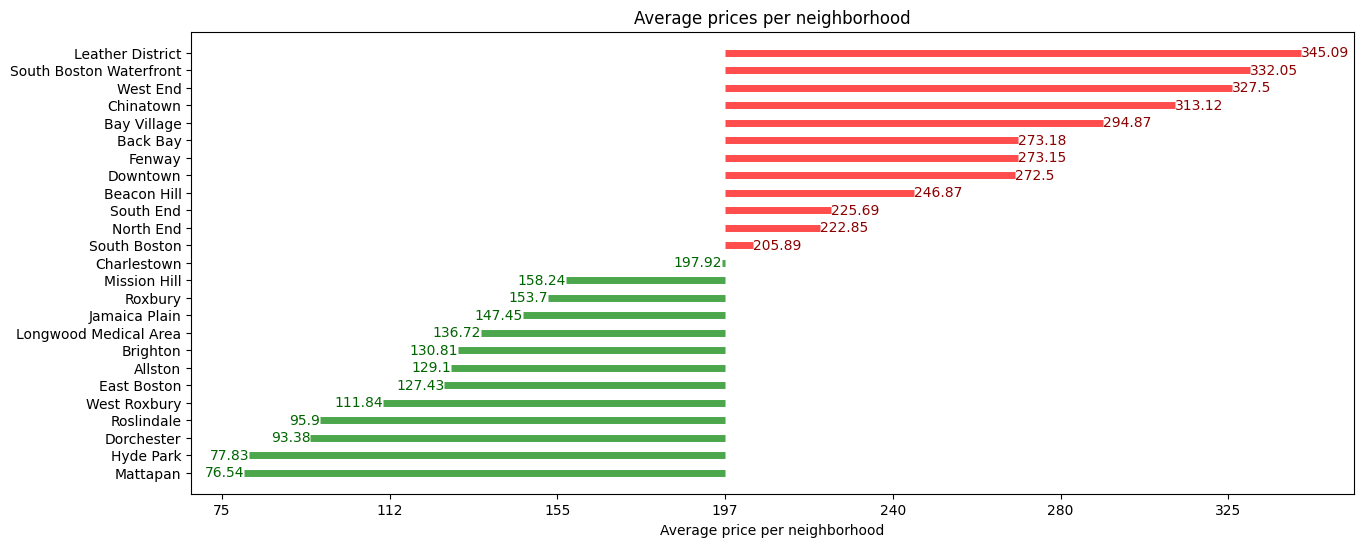

In [57]:
# plotting prices
# similar solution seen on https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/

fig, ax = plt.subplots(figsize=(15,6))
plt.hlines(y=neighborhood_price['neighborhood'], xmin=0, xmax=neighborhood_price['normalize'], color=neighborhood_price['colors'], alpha=0.7, linewidth=5);

ann_text = neighborhood_price['avg_price']
for norm, neigh, price in zip(neighborhood_price['normalize'], neighborhood_price['neighborhood'], ann_text):
    text = plt.text(norm, neigh, round(price, 2), horizontalalignment='right' if norm < 0 else 'left', verticalalignment='center', fontdict={'color':'darkred' if norm > 0 else 'darkgreen'})

label = ['0', '75', '112', '155', '197', '240', '280', '325']
ax.set_xticklabels(label)
plt.xlabel('Average price per neighborhood')
plt.title('Average prices per neighborhood')

Proximity to the center means higher prices. Charlestown or South Boston for a quiet, yet central and affordable area. South Boston or East Boston for a more vibrant and affordable area.

### Is the rating different for listings where the host rents more than one room?

In [58]:
## for this we will first split the listings dataframe into two dataframes 
##based on whether the host rents out only one room or more than one more.
## then we will then look at the overall distribution of number of rooms rented for all hosts with multi-listings.

In [59]:
# how many missing values are there in calculated_host_listings_count
price_reg['calculated_host_listings_count'].isnull().sum()

0

In [60]:
# create new data frame with listings only containing listings that are the only listing of a host in Boston
host_1 = price_reg[price_reg['calculated_host_listings_count'] == 1]

host_more = price_reg[price_reg['calculated_host_listings_count'] > 1]

(array([900., 159., 102.,  36., 111.,  25.,   0.,   0.,   0.,   0.,  50.,
          0.,  43.,  57.,   0.,   0.,   0.,  79.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0., 136.]),
 array([  2.        ,   6.46666667,  10.93333333,  15.4       ,
         19.86666667,  24.33333333,  28.8       ,  33.26666667,
         37.73333333,  42.2       ,  46.66666667,  51.13333333,
         55.6       ,  60.06666667,  64.53333333,  69.        ,
         73.46666667,  77.93333333,  82.4       ,  86.86666667,
         91.33333333,  95.8       , 100.26666667, 104.73333333,
        109.2       , 113.66666667, 118.13333333, 122.6       ,
        127.06666667, 131.53333333, 136.        ]),
 <BarContainer object of 30 artists>)

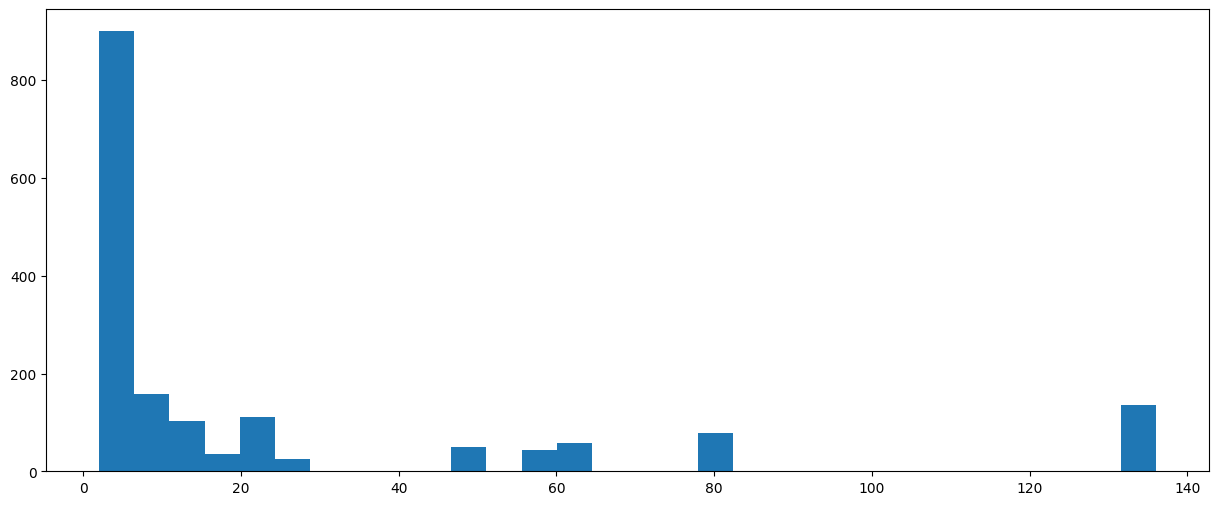

In [61]:
# distribution of number of listings per host (for hosts who have more than 1 listing)
plt.figure(figsize=(15,6))
plt.hist(host_more['calculated_host_listings_count'], bins=30)

In [62]:
##grouping the total ratings per number of listings per host and plotting the distributions of ratings 
## for single- and multi-listings,
## as well as the average ratings per number of listings.

# distribution of average ratings based on number of listings per host
host_more_rate = host_more.groupby('calculated_host_listings_count')['review_scores_rating'].mean()
list_num = [str(x) for x in host_more_rate.index]

Text(0, 0.5, 'Number of properties')

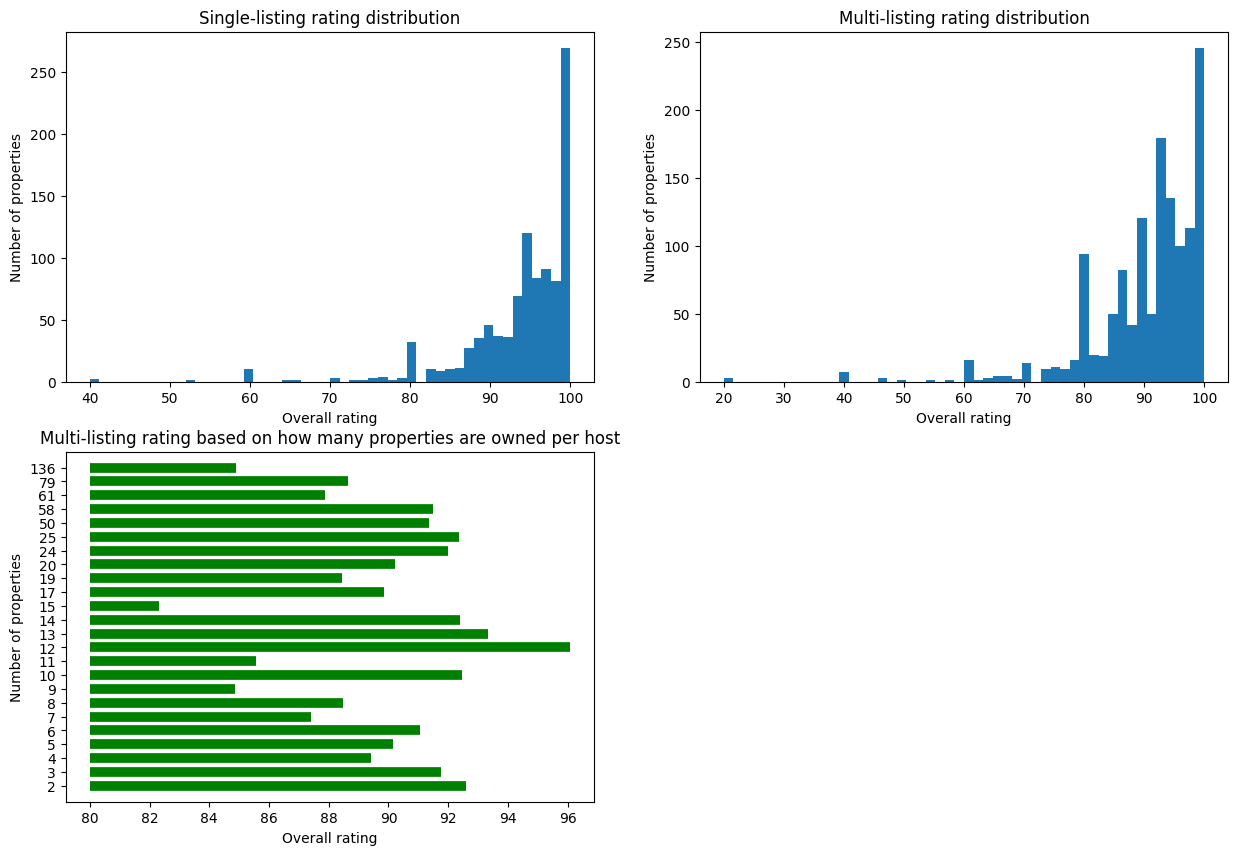

In [63]:
# plotting rating distribution split by single- and multi-listing properties
plt.figure(figsize=(15,10))
           
plt.subplot(2,2,1)
plt.hist(host_1['review_scores_rating'], bins=50)
plt.title('Single-listing rating distribution')
plt.xlabel('Overall rating')
plt.ylabel('Number of properties')

plt.subplot(2,2,2)
plt.hist(host_more['review_scores_rating'], bins=50)
plt.title('Multi-listing rating distribution')
plt.xlabel('Overall rating')
plt.ylabel('Number of properties')

# ratings of the 
plt.subplot(2,2,3)
plt.hlines(y=list_num, xmin=80, xmax=host_more_rate.values, linewidth=7, color='g')
plt.title('Multi-listing rating based on how many properties are owned per host')
plt.xlabel('Overall rating')
plt.ylabel('Number of properties')

calculating the average ratings for the total ratings, cleanliness, location, accuracy, checkin and communication. Then I am using Welch's t-test to determine whether the differences in ratings between single- and multi-listings are statistically significant.

In [64]:
def avg_sing_mul(rating):
    '''
    calculate average ratings for single- and multi-listings and distribution of cleanliness ratings
    based on number of listings per host
    INPUT: rating type
    OUTPUT: single-listing mean, multi-listing mean, distribution across number of listings
    '''
    
    host_1_mean = host_1[rating].mean()
    host_more_mean = host_more[rating].mean()
    host_more_distr = host_more.groupby('calculated_host_listings_count')[rating].mean()
    
    return host_1_mean, host_more_mean, host_more_distr

In [65]:
# average ratings between single- and multi-listings
host_1_rate, host_more_rate, host_more_rate_distr = avg_sing_mul('review_scores_rating')
print('total rating')
print('single-listings: {}'.format(host_1_rate), 'multi-listings: {}'.format(host_more_rate))

# average cleanliness ratings based on number of listings per host
host_1_clean, host_more_clean, host_more_clean_distr = avg_sing_mul('review_scores_cleanliness')
print('cleanliness rating')
print('single-listings: {}'.format(host_1_clean), 'multi-listings: {}'.format(host_more_clean))

# average location ratings based on number of listings per host
host_1_loc, host_more_loc, host_more_loc_distr = avg_sing_mul('review_scores_location')
print('location rating')
print('single-listings: {}'.format(host_1_loc), 'multi-listings: {}'.format(host_more_loc))

# average communication ratings based on number of listings per host
host_1_com, host_more_com, host_more_com_distr = avg_sing_mul('review_scores_communication')
print('communiation rating')
print('single-listings: {}'.format(host_1_com), 'multi-listings: {}'.format(host_more_com))

# average accuracy ratings based on number of listings per host
host_1_acc, host_more_acc, host_more_acc_distr = avg_sing_mul('review_scores_accuracy')
print('accuracy rating')
print('single-listings: {}'.format(host_1_acc), 'multi-listings: {}'.format(host_more_acc))

# average checkin ratings based on number of listings per host
host_1_cin, host_more_cin, host_more_cin_distr = avg_sing_mul('review_scores_checkin')
print('checkin rating')
print('single-listings: {}'.format(host_1_cin), 'multi-listings: {}'.format(host_more_cin))

total rating
single-listings: 93.90981963927855 multi-listings: 90.43426883308715
cleanliness rating
single-listings: 9.423694779116467 multi-listings: 9.2079940784604
location rating
single-listings: 9.539698492462312 multi-listings: 9.29111111111111
communiation rating
single-listings: 9.822110552763819 multi-listings: 9.513313609467456
accuracy rating
single-listings: 9.639195979899498 multi-listings: 9.27353595255745
checkin rating
single-listings: 9.810240963855422 multi-listings: 9.518134715025907


In [67]:
def impute(rating, mean_1, mean_more):
    '''
    impute missing values in both dataframes with means
    INPUT: rating = rating name, mean_1 = mean of df with single-listings, mean_more = mean of df with multi-listings
    OUTPUT: imputed dfs
    '''
    
    host_1[rating] = host_1[rating].fillna(mean_1)
    host_more[rating] = host_more[rating].fillna(mean_more)
    
    return host_1[rating], host_more[rating]

In [68]:
# imputing missing values in the review_scores_rating column with the mean
host_1['review_scores_rating'], host_more['review_scores_rating'] = impute('review_scores_rating', host_1_rate, host_more_rate)

# imputing missing values in the review_scores_cleanliness column with the mean
host_1['review_scores_cleanliness'], host_more['review_scores_cleanliness'] = impute('review_scores_cleanliness', host_1_clean, host_more_clean)

# imputing missing values in the review_scores_location column with the mean
host_1['review_scores_location'], host_more['review_scores_location'] = impute('review_scores_location', host_1_loc, host_more_loc)

# imputing missing values in the review_scores_communication column with the mean
host_1['review_scores_communication'], host_more['review_scores_communication'] = impute('review_scores_communication', host_1_com, host_more_com)

# imputing missing values in the review_scores_accuracy column with the mean
host_1['review_scores_accuracy'], host_more['review_scores_accuracy'] = impute('review_scores_accuracy', host_1_acc, host_more_acc)

# imputing missing values in the review_scores_checkin column with the mean
host_1['review_scores_checkin'], host_more['review_scores_checkin'] = impute('review_scores_checkin', host_1_cin, host_more_cin)


/var/folders/lq/d88dgpfd7x5dywf41x7l02dw0000gn/T/ipykernel_21144/54297738.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  host_1[rating] = host_1[rating].fillna(mean_1)
/var/folders/lq/d88dgpfd7x5dywf41x7l02dw0000gn/T/ipykernel_21144/54297738.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  host_more[rating] = host_more[rating].fillna(mean_more)
/var/folders/lq/d88dgpfd7x5dywf41x7l02dw0000gn/T/ipykernel_21144/4201421040.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

I chose to impute the missing values so that my data sets are not decreased. Larger datasets are better for t-tests and I didn't want to lose any valuable information.

In [69]:
# Do Welch's t-test for both samples and total ratings
stat_rate, p_rate = ttest_ind(host_more['review_scores_rating'], host_1['review_scores_rating'], equal_var=False)
# Printing the t-statistic and the p-value
print('total ratings: stat: {}, p: {}'.format(stat_rate, p_rate))

# Do Welch's t-test for both samples and cleanliness ratings
stat_clean, p_clean = ttest_ind(host_1['review_scores_cleanliness'], host_more['review_scores_cleanliness'], equal_var=False)
# Printing the t-statistic and the p-value
print('cleanlisness ratings: stat: {}, p: {}'.format(stat_clean, p_clean))

# Do Welch's t-test for both samples and location ratings
stat_loc, p_loc = ttest_ind(host_1['review_scores_location'], host_more['review_scores_location'], equal_var=False)
# Printing the t-statistic and the p-value
print('location ratings: stat: {}, p: {}'.format(stat_loc, p_loc))

# Do Welch's t-test for both samples and communication ratings
stat_com, p_com = ttest_ind(host_1['review_scores_communication'], host_more['review_scores_communication'], equal_var=False)
# Printing the t-statistic and the p-value
print('communication ratings: stat: {}, p: {}'.format(stat_com, p_com))

# Do Welch's t-test for both samples and accuracy ratings
stat_acc, p_acc = ttest_ind(host_1['review_scores_accuracy'], host_more['review_scores_accuracy'], equal_var=False)
# Printing the t-statistic and the p-value
print('accuracy ratings: stat: {}, p: {}'.format(stat_acc, p_acc))

# Do Welch's t-test for both samples and checkin ratings
stat_cin, p_cin = ttest_ind(host_1['review_scores_checkin'], host_more['review_scores_checkin'], equal_var=False)
# Printing the t-statistic and the p-value
print('checkin ratings: stat: {}, p: {}'.format(stat_cin, p_cin))

total ratings: stat: -12.205079437640329, p: 1.9068745426359393e-33
cleanlisness ratings: stat: 6.03841750113909, p: 1.7603708165168137e-09
location ratings: stat: 8.742247583475761, p: 3.797410800825824e-18
communication ratings: stat: 13.97208594139031, p: 6.273838921066014e-43
accuracy ratings: stat: 13.08454415945998, p: 4.73286609282033e-38
checkin ratings: stat: 12.638764807340735, p: 1.1507106903063091e-35


In [70]:
rate_list = ['overall rating', 'cleanliness', 'location', 'communication', 'accuracy', 'checkin']
rate_stat_df = pd.DataFrame()
rate_stat_df['rating_types'] = rate_list
rate_stat_df.set_index('rating_types', inplace=True)

rate_stat_df['single_listing_rating'] = [host_1_rate, host_1_clean, host_1_loc, host_1_com, host_1_acc, host_1_cin]
rate_stat_df['multi_listing_rating'] = [host_more_rate, host_more_clean, host_more_loc, host_more_com, host_more_acc, host_more_cin]
rate_stat_df['t_stat'] = [stat_rate, stat_clean, stat_loc, stat_com, stat_acc, stat_cin]
rate_stat_df['p_value'] = [p_rate, p_clean, p_loc, p_com, p_acc, p_cin]

rate_stat_df

single_listing_rating  multi_listing_rating     t_stat   
rating_types                                                             
overall rating              93.909820             90.434269 -12.205079  \
cleanliness                  9.423695              9.207994   6.038418   
location                     9.539698              9.291111   8.742248   
communication                9.822111              9.513314  13.972086   
accuracy                     9.639196              9.273536  13.084544   
checkin                      9.810241              9.518135  12.638765   

                     p_value  
rating_types                  
overall rating  1.906875e-33  
cleanliness     1.760371e-09  
location        3.797411e-18  
communication   6.273839e-43  
accuracy        4.732866e-38  
checkin         1.150711e-35

####This tells su that the two distributions of properties with single-listing hosts and properties with multi-listing hosts are indeed different for all the different types of ratings and thus, lower ratings in the group of multi-listings are statistically significant.

### Is there a difference in distributiong across neighborhoods between single- and multi-listing properties?

In [71]:
# average prices
mean_1 = host_1['avg_price'].mean()
mean_more = host_more['avg_price'].mean()

print('single-listing', mean_1)
print('multi-listing', mean_more)

single-listing 176.2754022564642
multi-listing 211.63297667937584


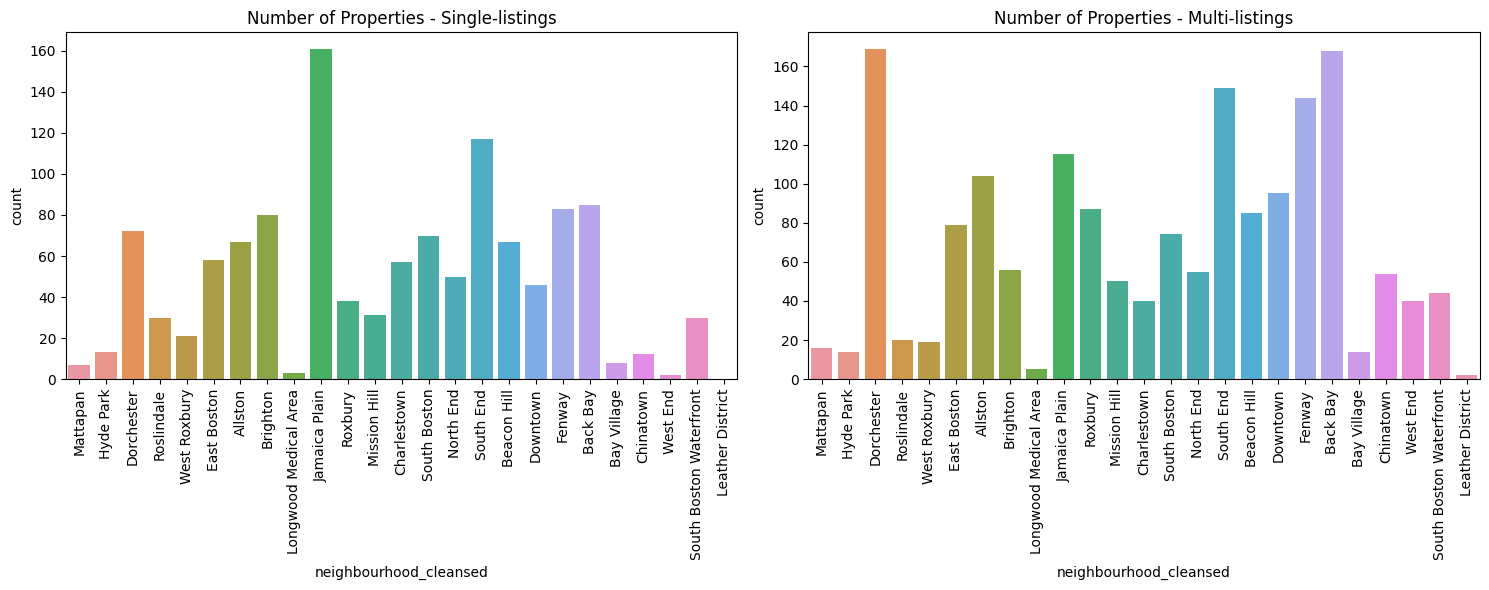

In [75]:
# plotting number of properties per neighborhood split by single- and multi-listings
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.countplot(data=host_1, x='neighbourhood_cleansed', order=neighborhood_price['neighborhood'])
plt.xticks(rotation=90)
plt.title('Number of Properties - Single-listings')

plt.subplot(1, 2, 2)
sns.countplot(data=host_more, x='neighbourhood_cleansed', order=neighborhood_price['neighborhood'])
plt.xticks(rotation=90)
plt.title('Number of Properties - Multi-listings')

plt.tight_layout()
plt.show()

In [76]:
# creating lists identifying above and below average price neighborhoods
below_avg = [x for x, y in zip(neighborhood_price['neighborhood'], neighborhood_price['normalize']) if y < 0]
above_avg = [x for x, y in zip(neighborhood_price['neighborhood'], neighborhood_price['normalize']) if y > 0]
below_avg

['Mattapan',
 'Hyde Park',
 'Dorchester',
 'Roslindale',
 'West Roxbury',
 'East Boston',
 'Allston',
 'Brighton',
 'Longwood Medical Area',
 'Jamaica Plain',
 'Roxbury',
 'Mission Hill',
 'Charlestown']

In [77]:
# get ratio of below average and above average neighborhoods
def temp_df(df):
    '''
    creating temporary dataframes for further analysis on property ratio in above and below average neighborhoods
    INPUT: df = data frame containing properties with either host who only has one listing or
           data frame containing properties with host who has more than one listing on Airbnb
    OUTPUT: dataframe 
    '''
    temp_df = pd.DataFrame(df.groupby('neighbourhood_cleansed')['name'].count())
    temp_df = temp_df.reset_index()
    return temp_df

def avg_ratio(df, abv_blw):
    '''
    calculating number of properties within above or below average neighborhoods
    INPUT: df = dataframe with count of properties per neighborhood, abv_blw = list of above or below average neighborhoods
    OUTPUT: count of properties
    '''
    count = 0
    for neigh in abv_blw:
        for row in df['neighbourhood_cleansed']:
            if neigh == row:
                loc_row = df[df['neighbourhood_cleansed']== neigh].index.item()
                count += df['name'][loc_row]
    return count

In [78]:
# calculating the ratios
temp_1_df = temp_df(host_1)
temp_more_df = temp_df(host_more)

below_host_1 = avg_ratio(temp_1_df, below_avg)
above_host_1 = avg_ratio(temp_1_df, above_avg)
host_1_ratio = below_host_1/(below_host_1+above_host_1)

below_host_more = avg_ratio(temp_more_df, below_avg)
above_host_more =  avg_ratio(temp_more_df, above_avg)
host_more_ratio =  below_host_more/(below_host_more + above_host_more) 

print('single-listing', host_1_ratio)
print('multi-listing', host_more_ratio)

single-listing 0.5281456953642384
multi-listing 0.4558303886925795


#### We can see that the single-listing properties are more often in below-average priced neighborhoods, while multi-listing properties are in areas with higher average prices.